<a href="https://colab.research.google.com/github/zahrabcht/DL_finalproject/blob/main/Speech_Emotion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the Dataset

In [1]:
import os
import requests
from zipfile import ZipFile

def download_and_unzip_dataset(url, zip_file_name, target_folder):
    # Check if the target folder exists
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Check if the zip file exists
    if os.path.exists(zip_file_name):
        print(f"{zip_file_name} already exists. Skipping download.")
    else:
        # Download the zip file
        response = requests.get(url)
        if response.status_code == 200:
            with open(zip_file_name, 'wb') as f:
                f.write(response.content)
            print(f"{zip_file_name} downloaded successfully.")

            # Unzip the file
            with ZipFile(zip_file_name, 'r') as zip_ref:
                zip_ref.extractall(target_folder)
            print(f"{zip_file_name} unzipped successfully.")
        else:
            print(f"Failed to download {zip_file_name}.")

In [2]:
dataset_url = 'https://zenodo.org/records/1188976/files/Audio_Speech_Actors_01-24.zip?download=1'
dataset_zip_file = 'ravdess-emotional-speech-audio.zip'
target_folder = 'Audios'

download_and_unzip_dataset(dataset_url, dataset_zip_file, target_folder)

ravdess-emotional-speech-audio.zip downloaded successfully.
ravdess-emotional-speech-audio.zip unzipped successfully.


# Importing some important libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
from IPython.display import Audio


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.layers import Dense, Conv1D, BatchNormalization, Dropout, MaxPooling1D, Flatten



# Loading the data

In [5]:
dataset_path = '/content/Audios/'
dir_list = os.listdir(dataset_path)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(dataset_path + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(dataset_path + i + '/' + f)

df = pd.DataFrame(emotion)
df = df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
df = pd.concat([pd.DataFrame(gender),df],axis=1)
df.columns = ['genders','emotions']
df['labels'] =df.genders + '_' + df.emotions
df = pd.concat([df,pd.DataFrame(path, columns = ['path'])],axis=1)
df.emotions.value_counts()

emotions
neutral     288
angry       192
happy       192
sad         192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64

In [6]:
df.head()

genders emotions        labels  \
0    male    angry    male_angry   
1    male    happy    male_happy   
2    male  neutral  male_neutral   
3    male      sad      male_sad   
4    male      sad      male_sad   

                                                path  
0  /content/Audios/Actor_01/03-01-05-02-01-01-01.wav  
1  /content/Audios/Actor_01/03-01-03-02-02-01-01.wav  
2  /content/Audios/Actor_01/03-01-01-01-02-02-01.wav  
3  /content/Audios/Actor_01/03-01-04-02-02-02-01.wav  
4  /content/Audios/Actor_01/03-01-04-02-02-01-01.wav

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['labels'].value_counts()
    for x_label, grp in _df_3.groupby('emotions')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('emotions')
_ = plt.ylabel('labels')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['path'].value_counts()
    for x_label, grp in _df_4.groupby('labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('labels')
_ = plt.ylabel('path')

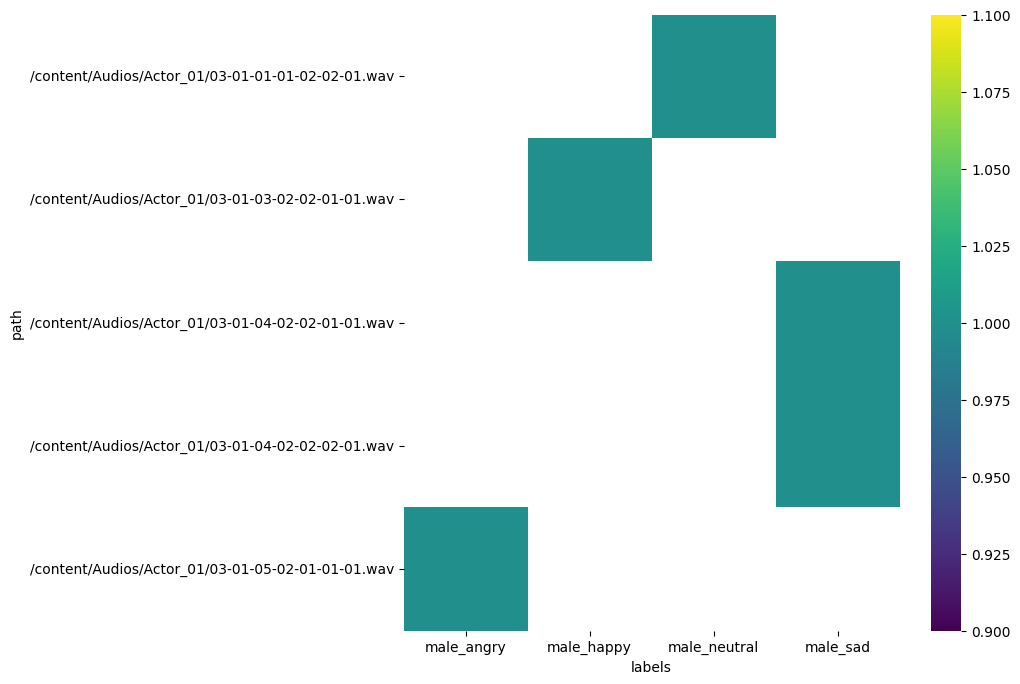

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['path'].value_counts()
    for x_label, grp in _df_4.groupby('labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('labels')
_ = plt.ylabel('path')

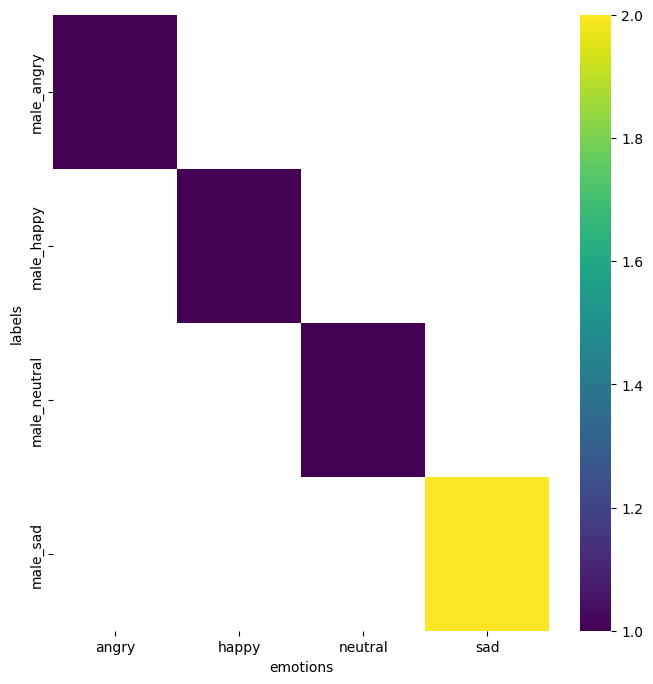

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['labels'].value_counts()
    for x_label, grp in _df_3.groupby('emotions')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('emotions')
_ = plt.ylabel('labels')

# Exploratory data analysis


### Plotting the count of each emotion with genders

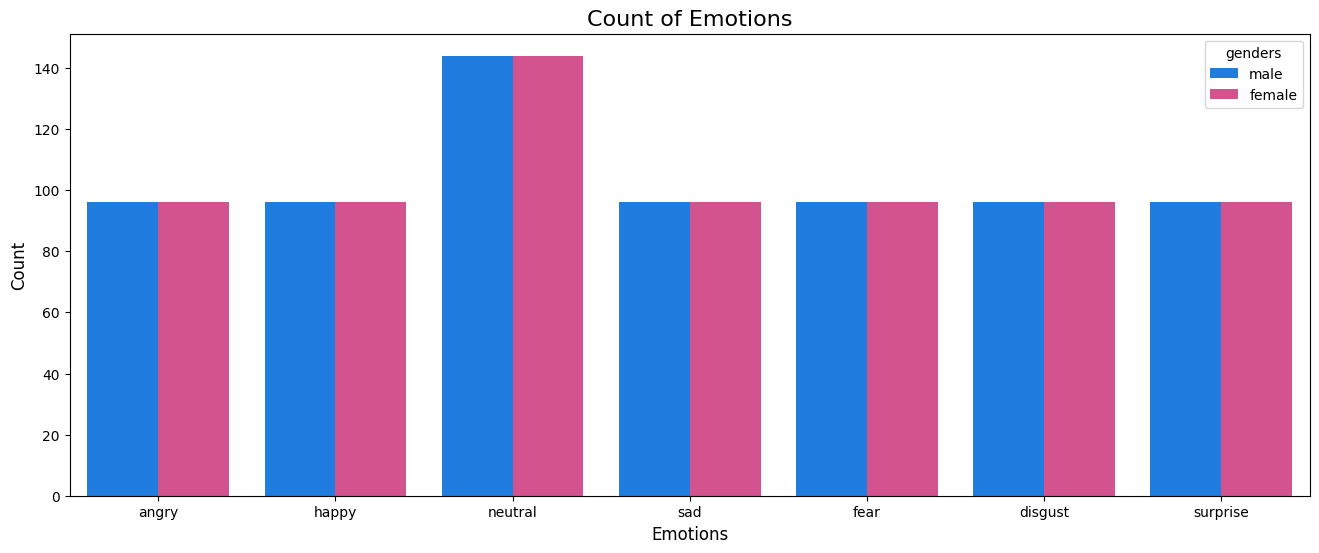

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
plt.title('Count of Emotions', size=16)

# Clear, vibrant colors: blue for male, pink-purple for female
sns.countplot(data=df, x='emotions', hue='genders', palette={'male': '#007bff', 'female': '#e83e8c'})

plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.show()


**- We have 1440 audio files in total, They are seperated between each genders equally.**

**- Out data is equally distriputed between emotions, except 'neutral' which has a bit more audio samples.**

### Showing the waveforms and spectograms for a sample of each emotion

In [8]:
# Helper function to print a sample waveplot of a the given emotion
def print_waveform_spectogram(emotion, path):

    # loading audio with the desired emotion
    data, sampling_rate = librosa.load(path)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # plotting the sample waveform
    librosa.display.waveshow(data, sr=sampling_rate, ax = ax1)
    ax1.set_title(f'Waveplot for audio with {emotion} emotion', size=12)
    ax1.set_xlabel('Time (seconds)', size=12)
    ax1.set_ylabel('Amplitude', size=12)


    # plotting the sample mel spectogram
    spectogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    spectogram_db = librosa.power_to_db(spectogram, ref=np.max)
    img = librosa.display.specshow(spectogram_db, sr=sampling_rate, x_axis='time', y_axis='mel', ax=ax2)
    plt.colorbar(img, format='%+2.0f dB', ax=ax2)
    ax2.set_title(f'Mel spectrogram for audio with {emotion} emotion', size=12)
    ax2.set_xlabel('Time (seconds)', size=12)
    ax2.set_ylabel('Hz', size=12)

    # showing the plot
    plt.tight_layout()
    plt.show()


#### 1- Happy

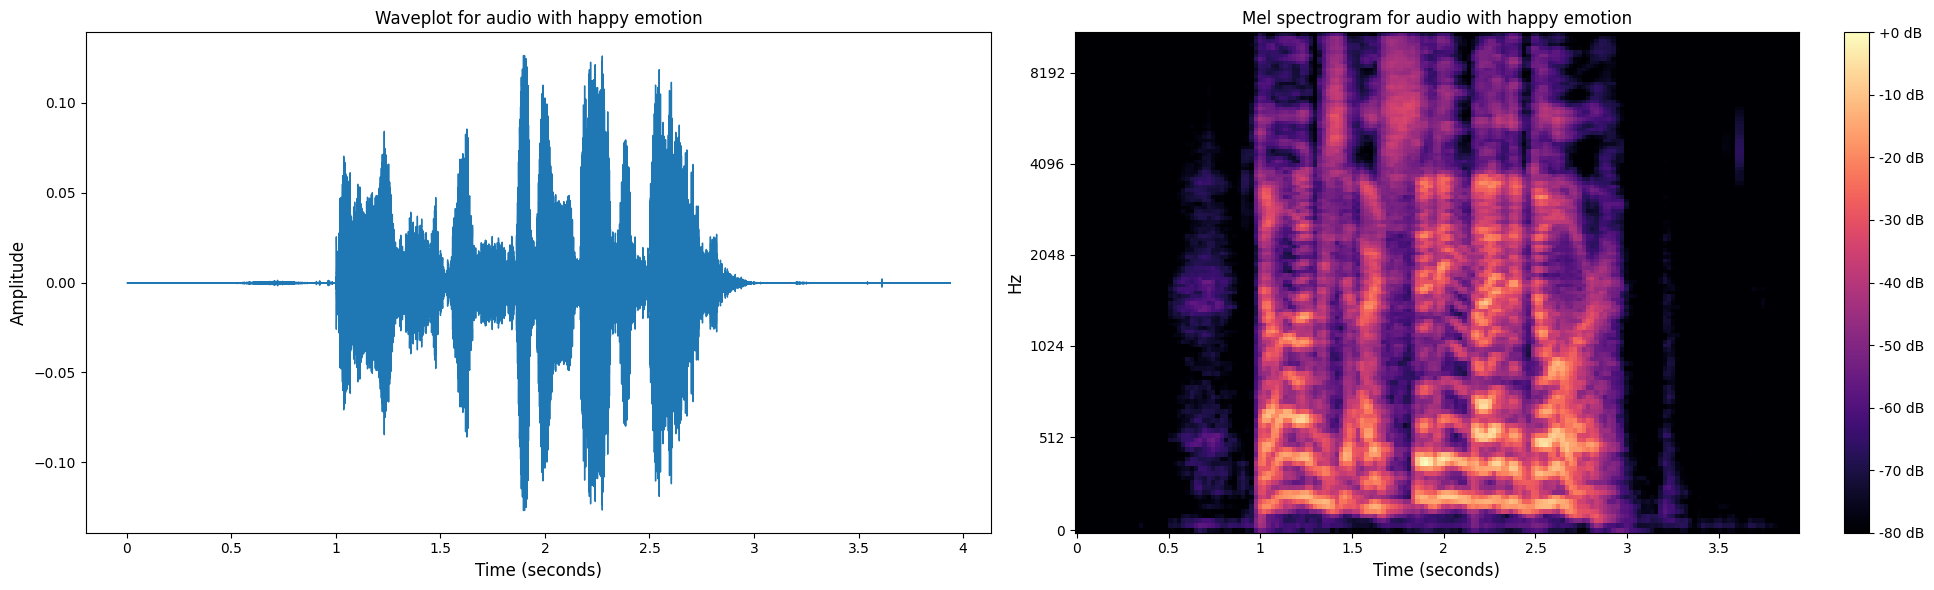

In [9]:
# Choosing a sample of 'happy' emotion to show plots for
sample_happy = df[df.emotions == 'happy']['path'].iloc[0]


# Printing the waveform and spectogram for the audio sample
print_waveform_spectogram('happy', sample_happy)


# Showing the audio to play it
Audio(sample_happy)

#### 2- Fear

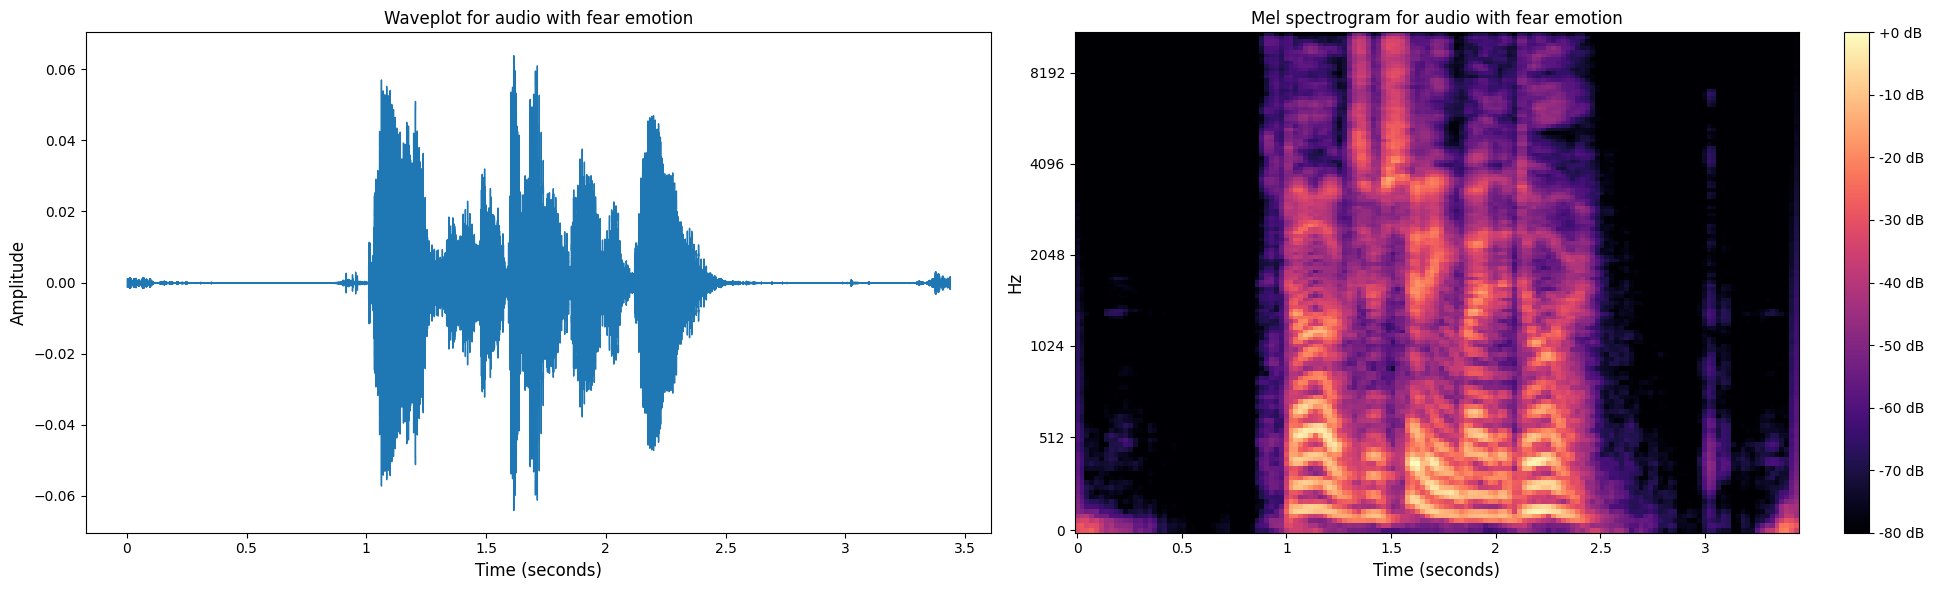

In [10]:
# Choosing a sample of 'fear' emotion to show plots for
sample_fear = df[df.emotions == 'fear']['path'].iloc[0]


# Printing the waveform and spectogram for the audio sample
print_waveform_spectogram('fear', sample_fear)


# Showing the audio to play it
Audio(sample_fear)

#### 3- Neutral

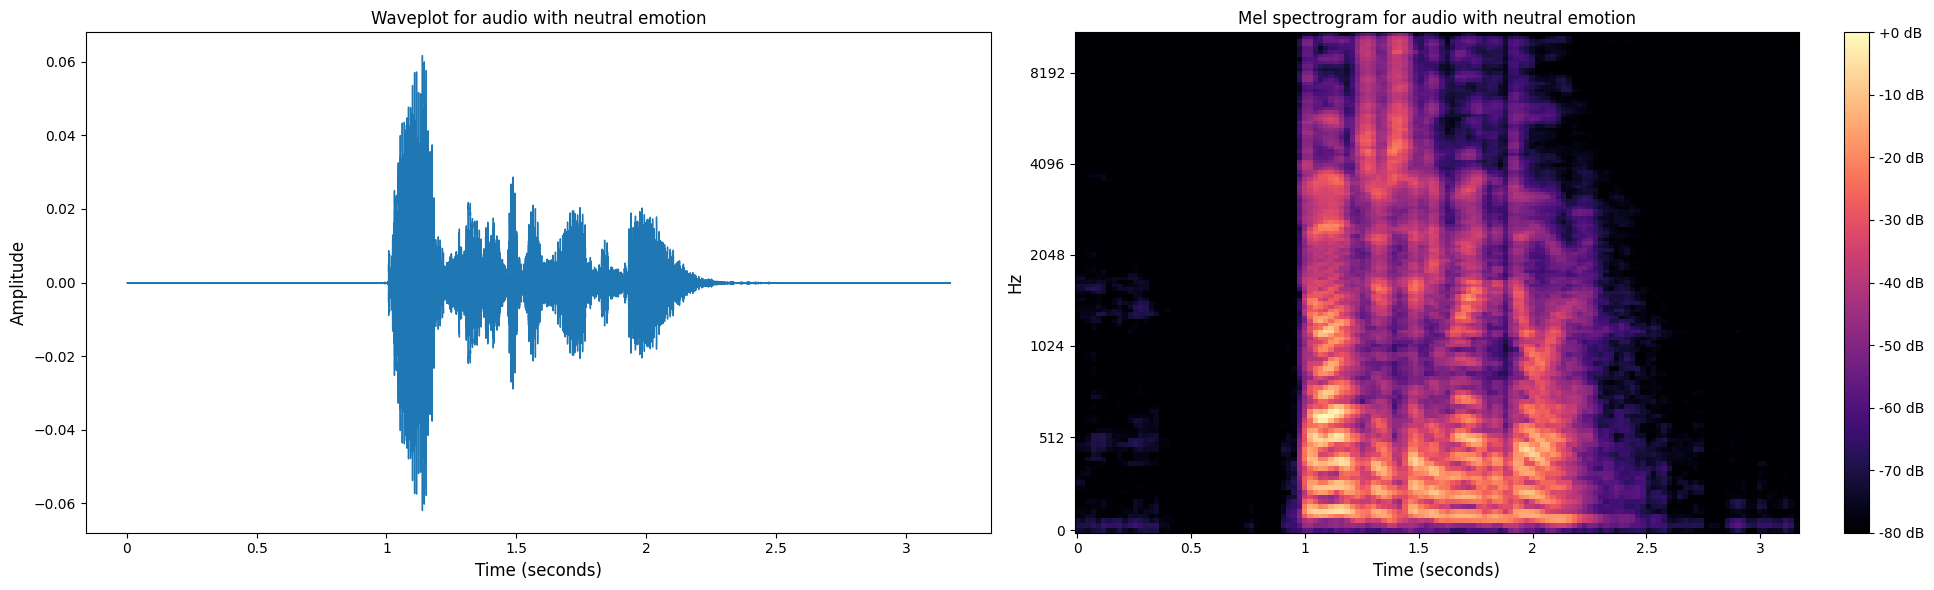

In [11]:
# Choosing a sample of 'neutral' emotion to show plots for
sample_neutral = df[df.emotions == 'neutral']['path'].iloc[0]


# Printing the waveform and spectogram for the audio sample
print_waveform_spectogram('neutral', sample_neutral)


# Showing the audio to play it
Audio(sample_neutral)

#### 4- Sad

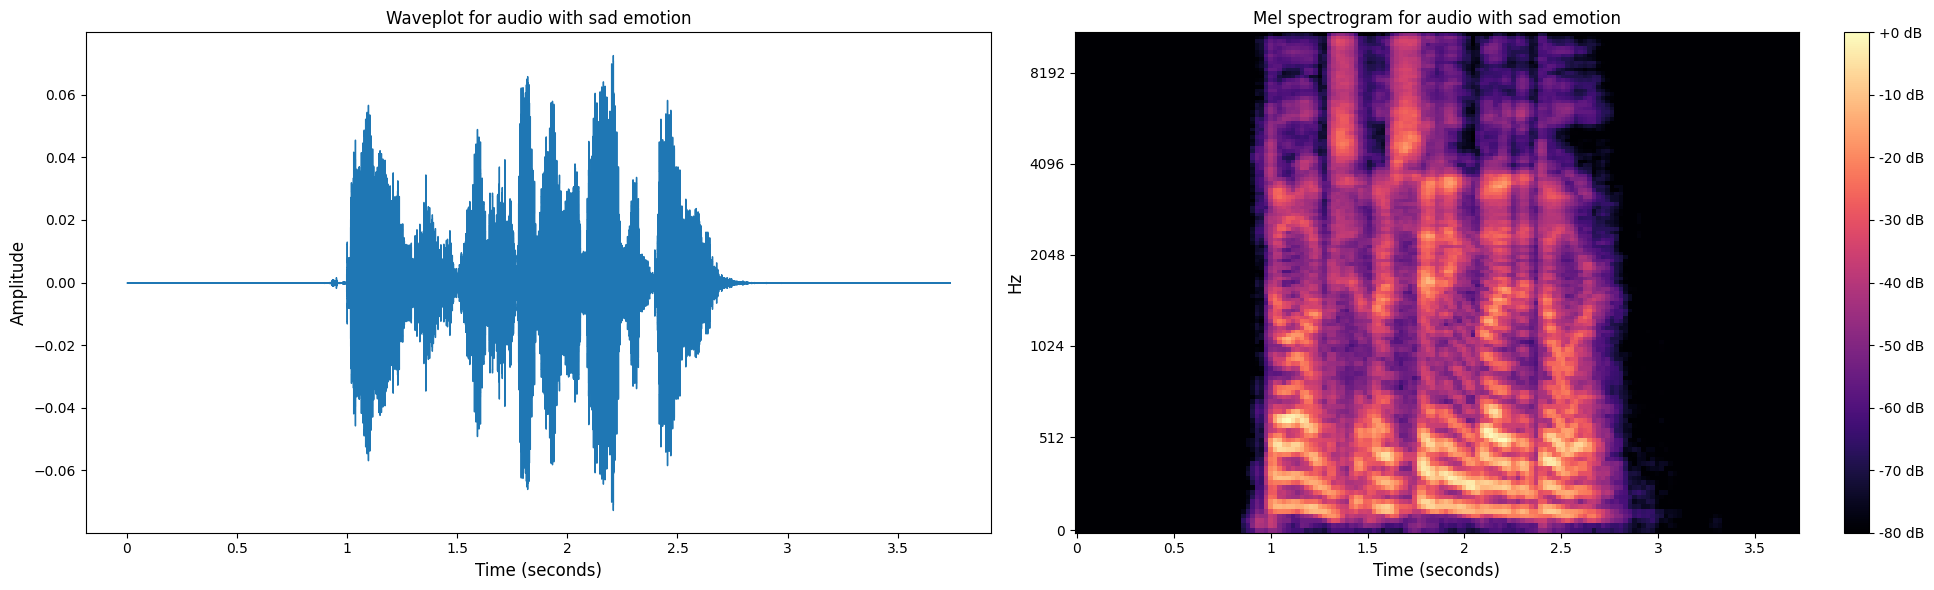

In [12]:
# Choosing a sample of 'sad' emotion to show plots for
sample_sad = df[df.emotions == 'sad']['path'].iloc[0]


# Printing the waveform and spectogram for the audio sample
print_waveform_spectogram('sad', sample_sad)


# Showing the audio to play it
Audio(sample_sad)

#### 5- Disgust

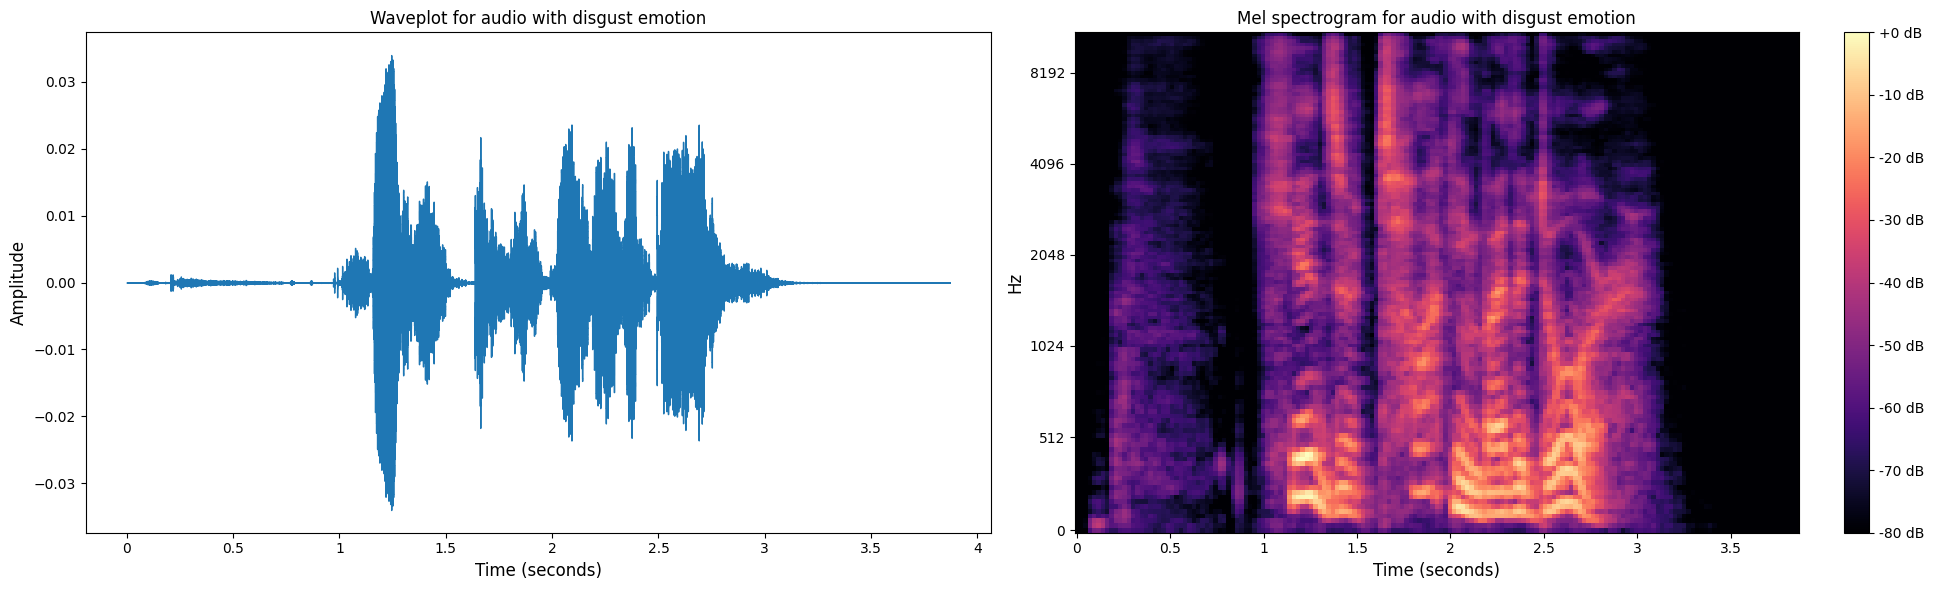

In [13]:
# Choosing a sample of 'disgust' emotion to show plots for
sample_disgust = df[df.emotions == 'disgust']['path'].iloc[0]


# Printing the waveform and spectogram for the audio sample
print_waveform_spectogram('disgust', sample_disgust)


# Showing the audio to play it
Audio(sample_disgust)

#### 6- Surprise

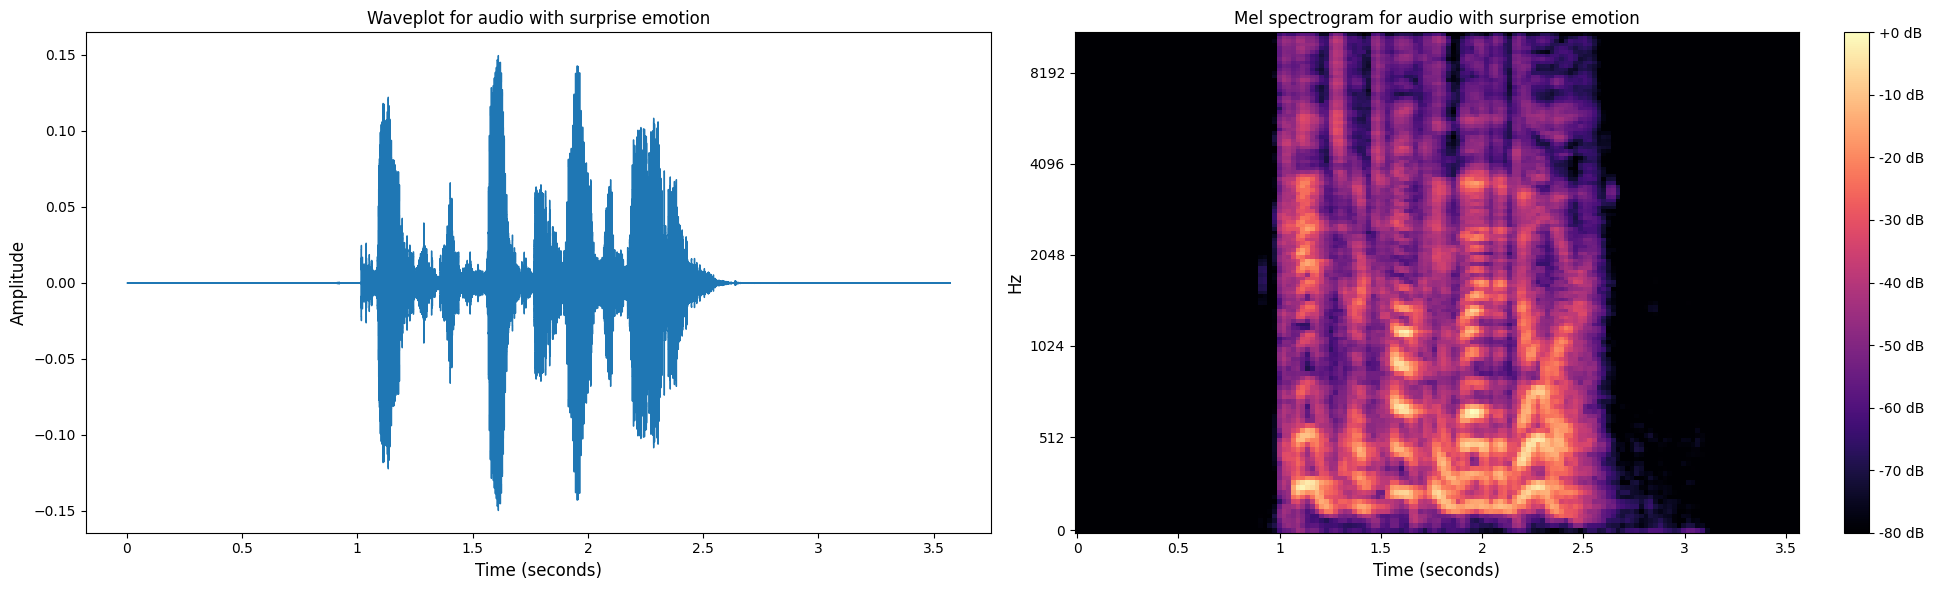

In [14]:
# Choosing a sample of 'surprise' emotion to show plots for
sample_surprise = df[df.emotions == 'surprise']['path'].iloc[0]


# Printing the waveform and spectogram for the audio sample
print_waveform_spectogram('surprise', sample_surprise)


# Showing the audio to play it
Audio(sample_surprise)

#### 7- Angry

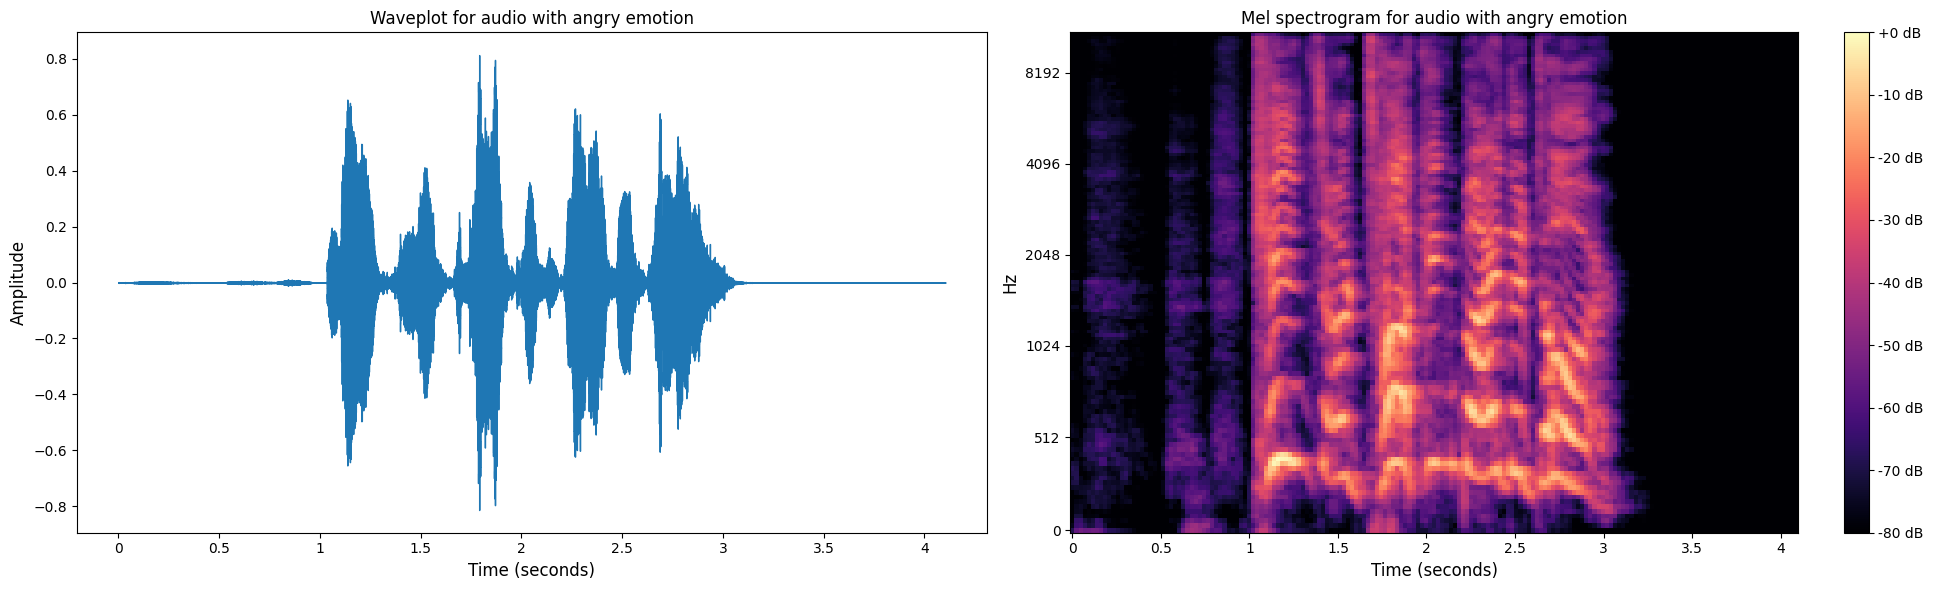

In [15]:
# Choosing a sample of 'angry' emotion to show plots for
sample_angry = df[df.emotions == 'angry']['path'].iloc[0]


# Printing the waveform and spectogram for the audio sample
print_waveform_spectogram('angry', sample_angry)


# Showing the audio to play it
Audio(sample_angry)

# Data augmentation


In [16]:
def noise(data):

    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data



def shift(data):

    s_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, s_range)


def stretch(data, rate=0.85):

    data = librosa.effects.time_stretch(data, rate = rate)
    return data

def pitch(data, sample_rate):

    data = librosa.effects.pitch_shift(data.astype('float64'),
                                      sr = sample_rate, n_steps=.7)
    return data



### Applying these augmentations methods to a sample audio

In [17]:
def show_waveform_spectogram(data, sampling_rate, aug):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # plotting the sample waveform
    librosa.display.waveshow(data, sr=sampling_rate, ax = ax1)
    ax1.set_title(f'Waveplot for audio "{aug}"', size=12)
    ax1.set_xlabel('Time (seconds)', size=12)
    ax1.set_ylabel('Amplitude', size=12)


    # plotting the sample mel spectogram
    spectogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    spectogram_db = librosa.power_to_db(spectogram, ref=np.max)
    img = librosa.display.specshow(spectogram_db, sr=sampling_rate, x_axis='time', y_axis='mel', ax=ax2)
    plt.colorbar(img, format='%+2.0f dB', ax=ax2)
    ax2.set_title(f'Mel spectrogram for audio "{aug}"', size=12)
    ax2.set_xlabel('Time (seconds)', size=12)
    ax2.set_ylabel('Hz', size=12)

    # showing the plot
    plt.tight_layout()
    plt.show()


In [18]:
# Choosing a sample of 'neutral' emotion to show plots for
sample = df['path'].iloc[0]

org_data, sample_rate = librosa.load(sample)

##### 1- Normal audio

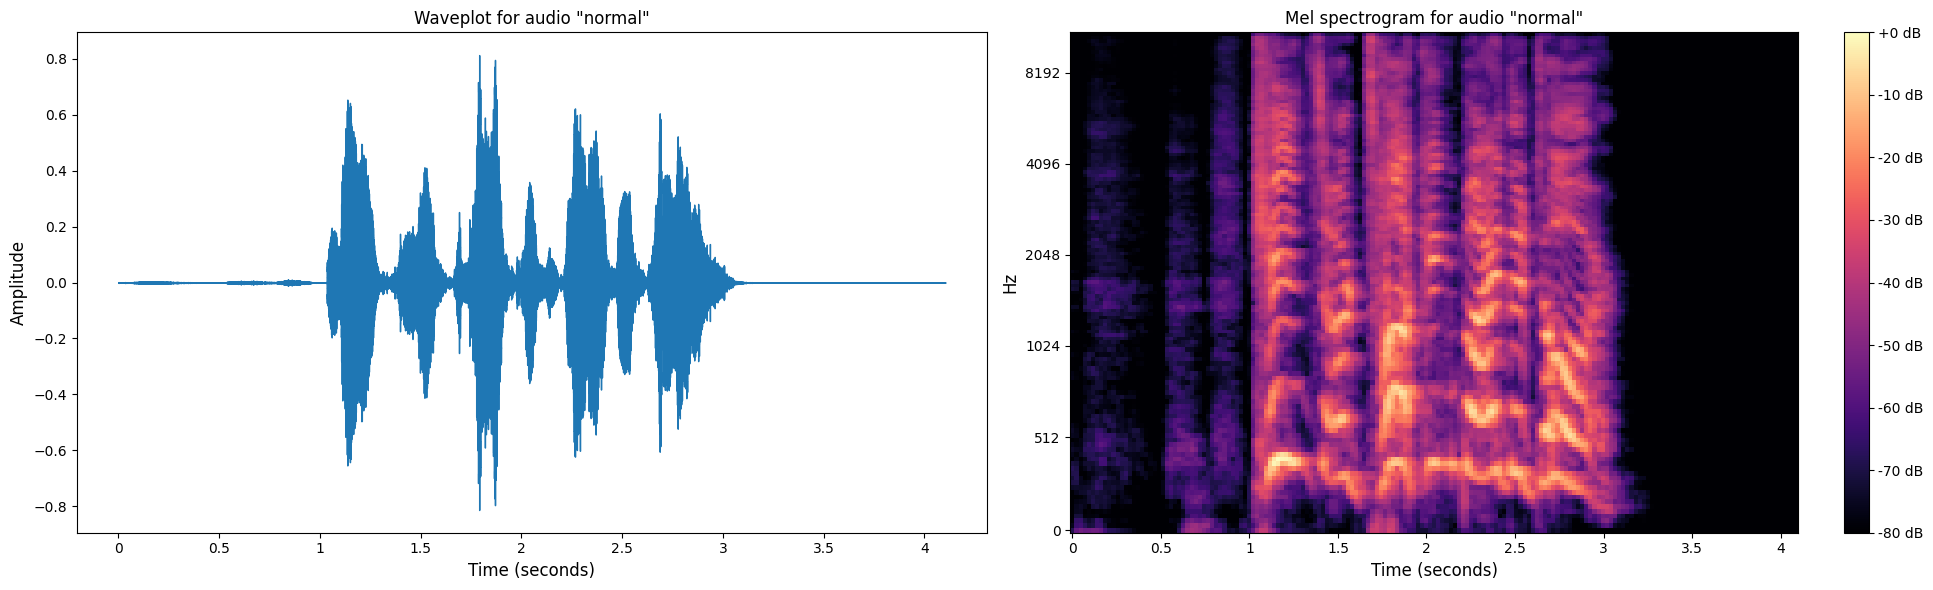

In [19]:
# Printing the waveform and spectogram for the audio sample
show_waveform_spectogram(org_data, sample_rate, 'normal')

# Showing the audio to play it
Audio(sample)

##### 2- Adding noise

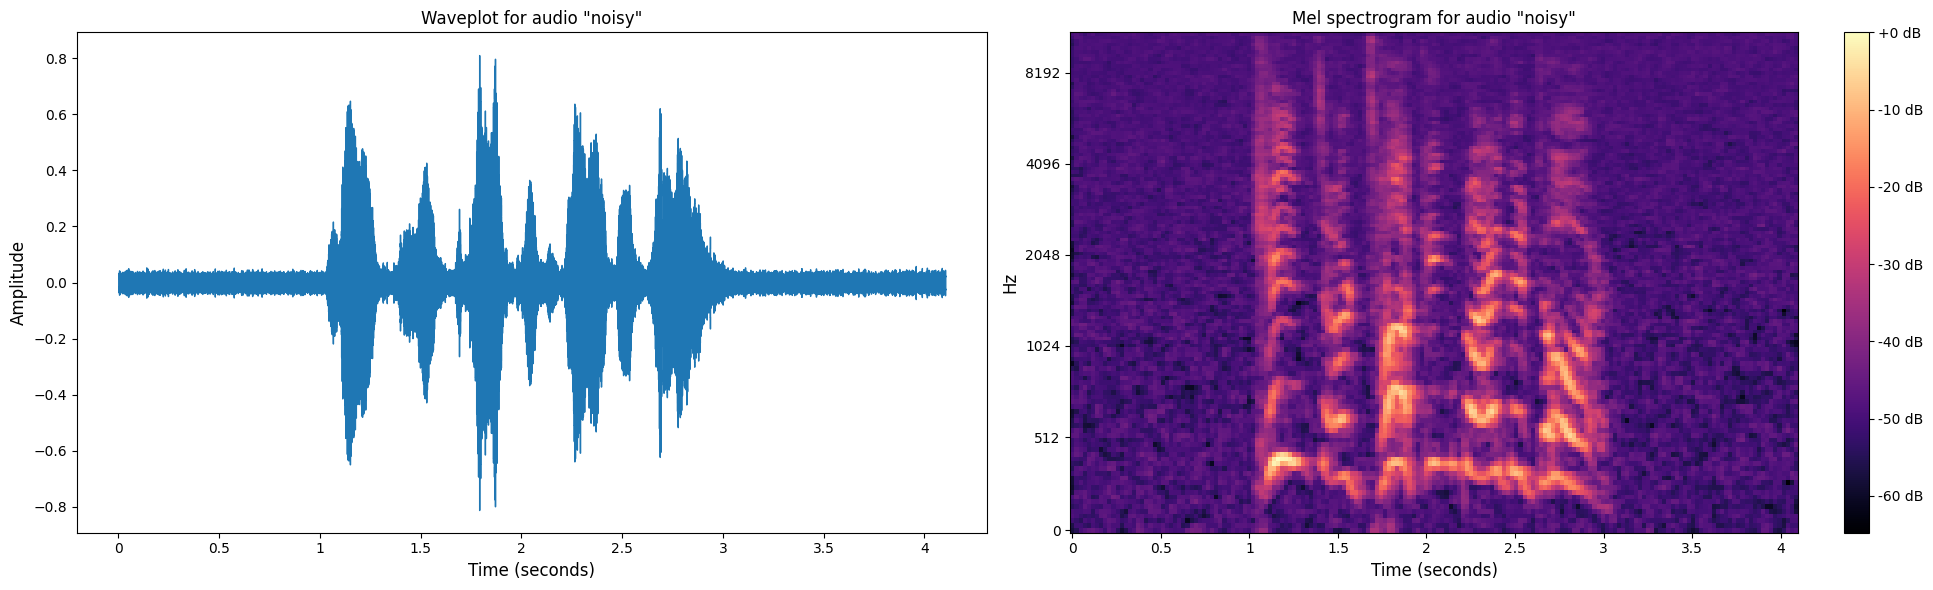

In [20]:
noise_data = noise(org_data)

# Printing the waveform and spectogram for the audio sample
show_waveform_spectogram(noise_data, sample_rate, 'noisy')

# Showing the audio to play it
Audio(noise_data, rate=sample_rate)

##### 3- Shifting

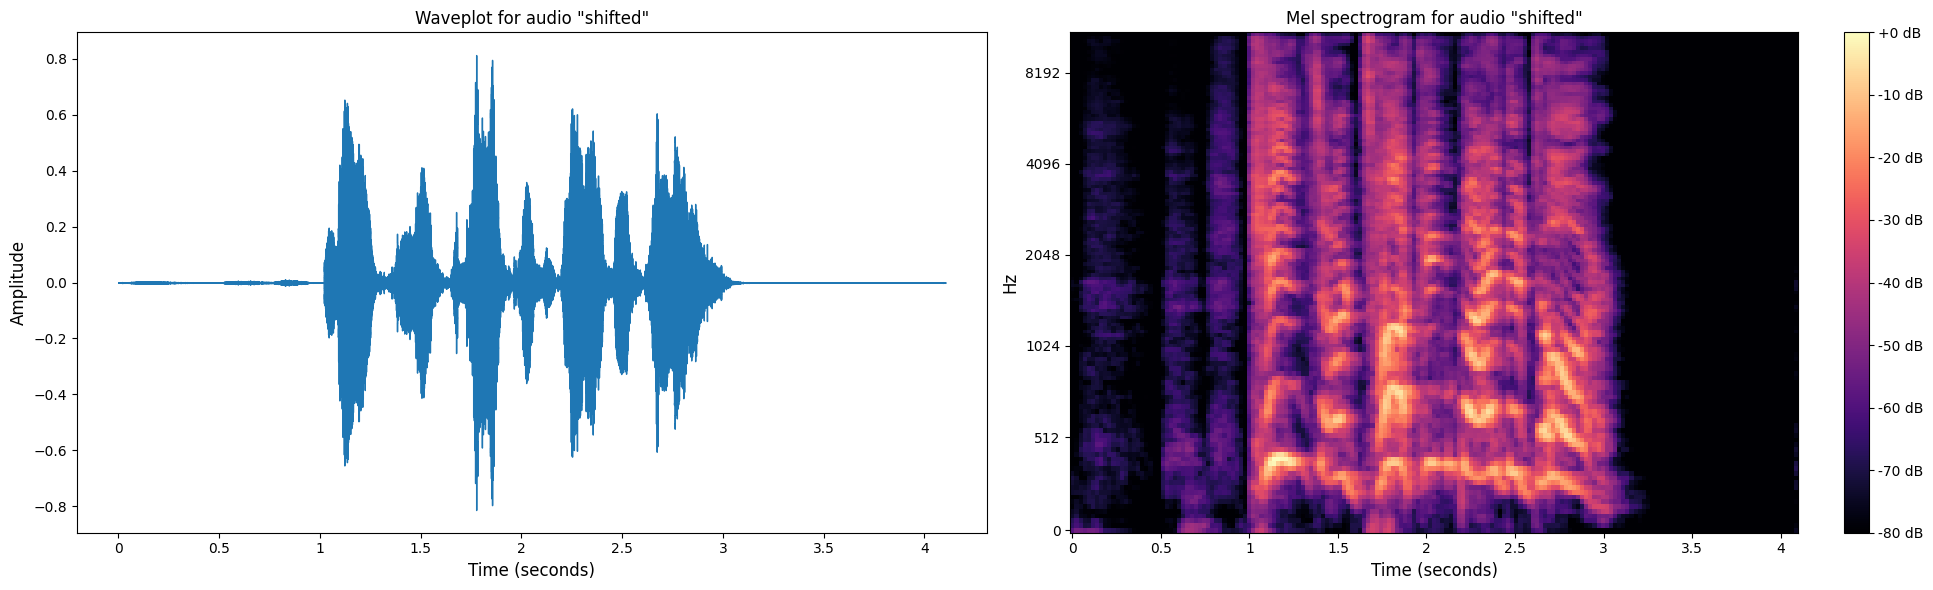

In [21]:
shifted_data = shift(org_data)

# Printing the waveform and spectogram for the audio sample
show_waveform_spectogram(shifted_data, sample_rate, 'shifted')

# Showing the audio to play it
Audio(shifted_data, rate=sample_rate)

##### 4- Stretching

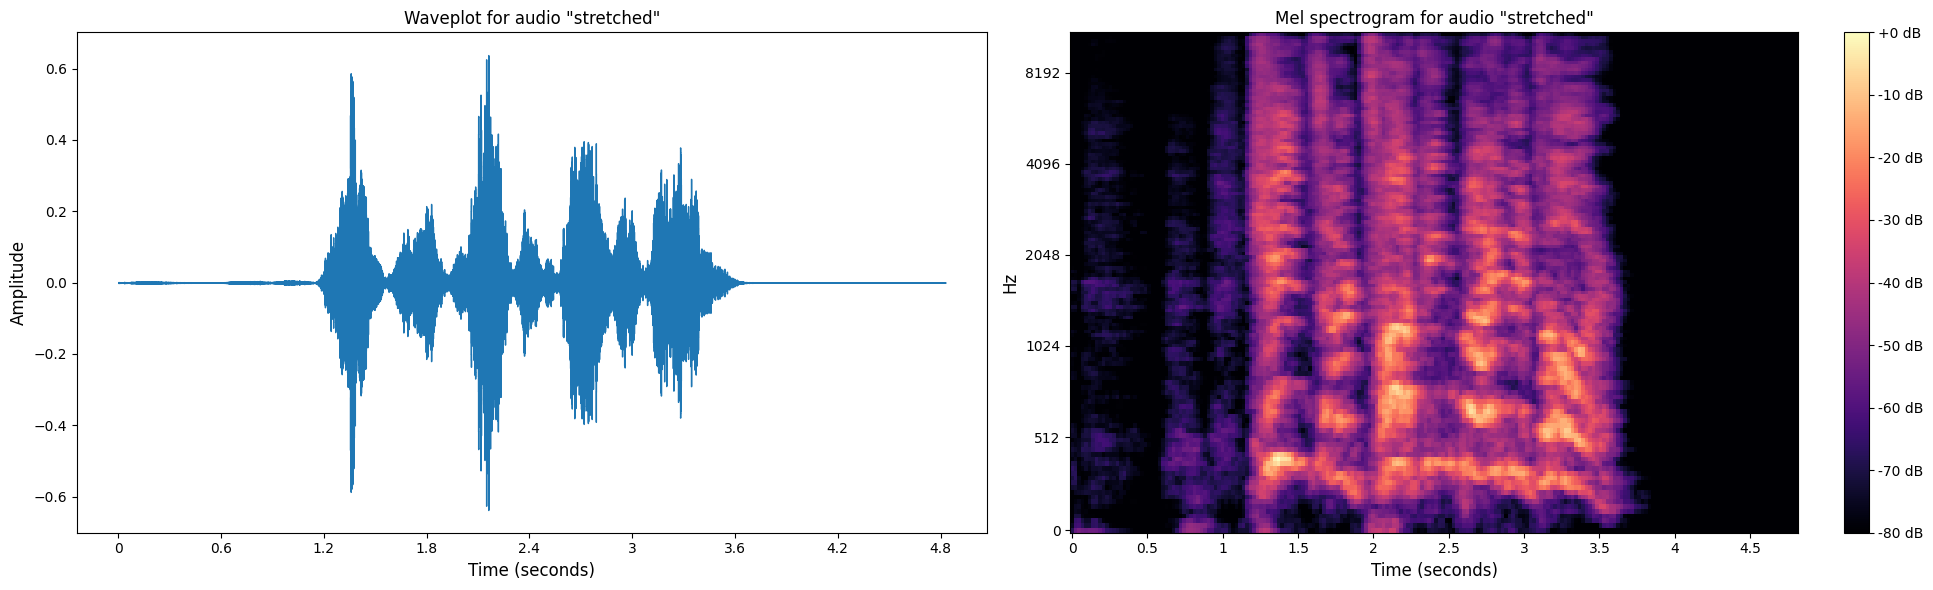

In [22]:
stretched_data = stretch(org_data)

# Printing the waveform and spectogram for the audio sample
show_waveform_spectogram(stretched_data, sample_rate, 'stretched')

# Showing the audio to play it
Audio(stretched_data, rate=sample_rate)

##### 5- pitching

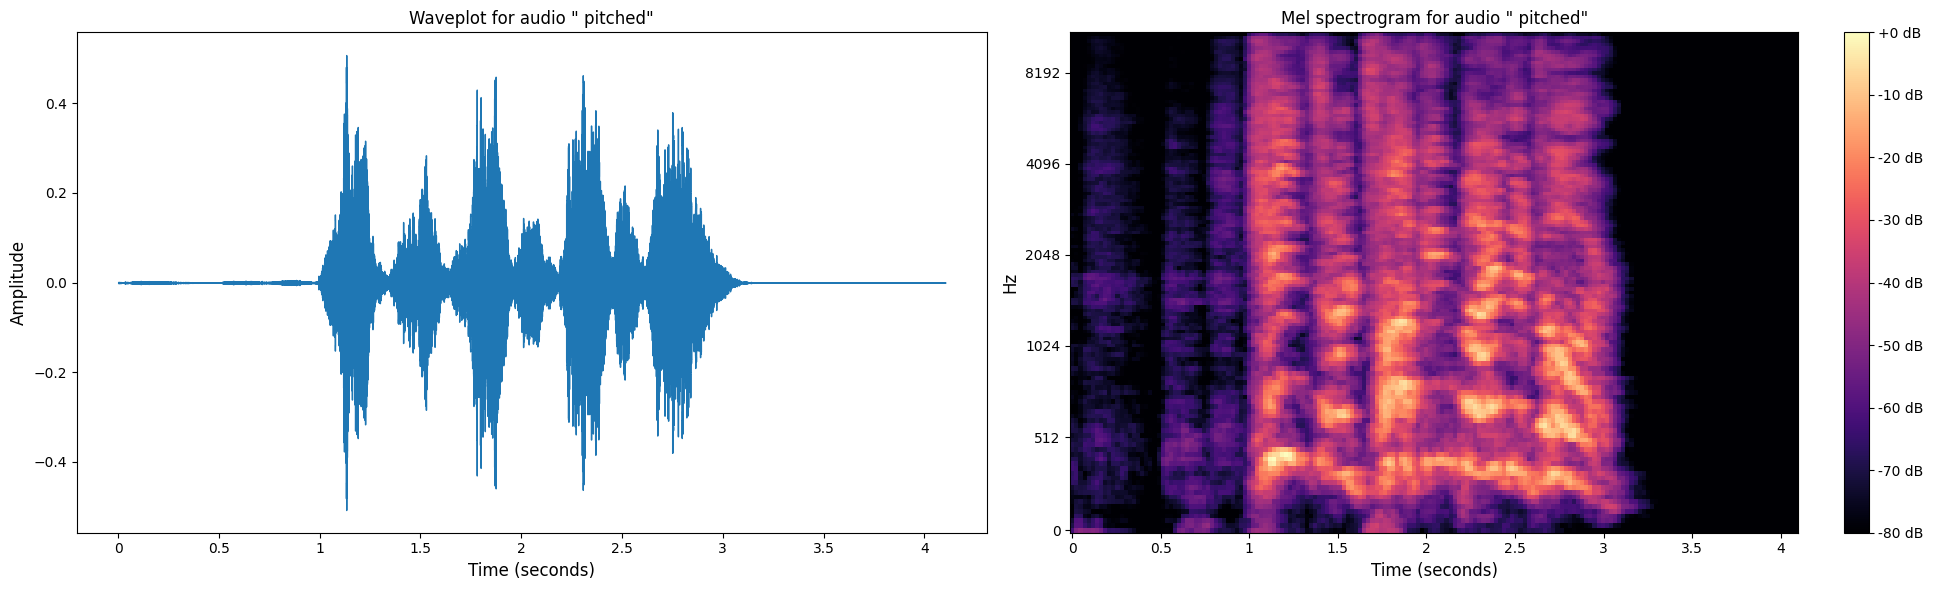

In [23]:
pitched_data = pitch(org_data, sample_rate)

# Printing the waveform and spectogram for the audio sample
show_waveform_spectogram(pitched_data, sample_rate, ' pitched')

# Showing the audio to play it
Audio(pitched_data, rate=sample_rate)

# feature extraction

In [24]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=20, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfccs.T) if not flatten else np.ravel(mfccs.T)

# def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
#     result=np.array([])

#     result=np.hstack((result,
#                       zcr(data,frame_length,hop_length),
#                       rmse(data,frame_length,hop_length),
#                       mfcc(data,sr,frame_length,hop_length)
#                      ))
#     return result

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    mfcc_features = mfcc(data, sr, frame_length, hop_length)
    return mfcc_features

In [25]:
def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    features = []


    orig_features = extract_features(data)
    features.append(orig_features)

    noisy_data = noise(data)
    noisy_features = extract_features(noisy_data)
    features.append(noisy_features)

    shifted_data = shift(data)
    shifted_features = extract_features(shifted_data)
    features.append(shifted_features)

    stretched_data = stretch(data)
    stretched_features = extract_features(stretched_data)
    features.append(stretched_features)

    pitched_data = pitch(data, sr)
    pitched_features = extract_features(pitched_data)
    features.append(pitched_features)




    # Ensure all features have the same length by padding if necessary
    max_len = max(len(f) for f in features)
    padded_features = [np.pad(f, (0, max_len - len(f))) for f in features]

    return np.array(padded_features)

In [26]:

from joblib import Parallel, delayed

def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        Y.append(emotion)
    return X, Y

paths = df.path
emotions = df.emotions

results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


# data preprocessing

In [27]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)


In [28]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2536         True
2537         True
2538         True
2539         True
Emotions    False
Length: 2541, dtype: bool


In [29]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2536        False
2537        False
2538        False
2539        False
Emotions    False
Length: 2541, dtype: bool


(7200, 2541)

In [30]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [31]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [32]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)


In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5760, 2540), (5760, 7), (1440, 2540), (1440, 7))

# models

In [34]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    random_state=42             )

dt_model = dt_model.fit(x_train,y_train)

y_pred = dt_model.predict(x_test)

In [35]:
print("Training set score: {:.3f}".format(dt_model.score(x_train, y_train)))
print("Test set score: {:.3f}".format(dt_model.score(x_test, y_test)))

Training set score: 1.000
Test set score: 0.399


In [36]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [37]:
y_pred=knn.predict(x_test)

In [38]:
print("Training set score: {:.3f}".format(knn.score(x_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(x_test, y_test)))

Training set score: 0.662
Test set score: 0.477


In [39]:


model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1],1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2538, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1269, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 81216)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,197,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,198,599 (19.83 MB)

 Trainable params: 5,198,599 (19.83 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.2543 - loss: 2.3632 - val_accuracy: 0.3549 - val_loss: 1.5748
Epoch 2/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3708 - loss: 1.5745 - val_accuracy: 0.4431 - val_loss: 1.4361
Epoch 3/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4174 - loss: 1.5011 - val_accuracy: 0.5014 - val_loss: 1.3374
Epoch 4/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4509 - loss: 1.3720 - val_accuracy: 0.5306 - val_loss: 1.2475
Epoch 5/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4874 - loss: 1.3143 - val_accuracy: 0.5472 - val_loss: 1.2456
Epoch 6/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5178 - loss: 1.2343 - val_accuracy: 0.5778 - val_loss: 1.1229
Epoch 7/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5428 - loss: 1.1520 - val_accuracy: 0.5896 - val_loss: 1.1346
Epoch 8/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5390 - loss: 1.1315 - 

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential([
    LSTM(128, input_shape=(x_train.shape[1], 1), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # assuming 7 classes
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,271 (294.03 KB)

 Trainable params: 75,271 (294.03 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history1 = model_lstm.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.1961 - loss: 1.9371 - val_accuracy: 0.1937 - val_loss: 1.9257
Epoch 2/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.2063 - loss: 1.9291 - val_accuracy: 0.1958 - val_loss: 1.9299
Epoch 3/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.2140 - loss: 1.9214 - val_accuracy: 0.1875 - val_loss: 1.9274
Epoch 4/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.2054 - loss: 1.9225 - val_accuracy: 0.1931 - val_loss: 1.9287
Epoch 5/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.2098 - loss: 1.9216 - val_accuracy: 0.1917 - val_loss: 1.9268
Epoch 6/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.2065 - loss: 1.9205 - val_accuracy: 0.1958 - val_loss: 1.9218
Epoch 7/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.2179 - loss: 1.9104 - val_accuracy: 0.1951 - val_loss: 1.9234
Epoch 8/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.2096 - loss: 1

# Evalution


In [41]:

y_train_pred = np.argmax(model.predict(x_train), axis=1)
train_accuracy = np.mean(y_train_pred == np.argmax(y_train, axis=1))
print("Training Accuracy:", train_accuracy)

y_test_pred = np.argmax(model.predict(x_test), axis=1)
test_accuracy = np.mean(y_test_pred == np.argmax(y_test, axis=1))
print("Test Accuracy:", test_accuracy)


180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Accuracy: 0.9748263888888888
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.7479166666666667


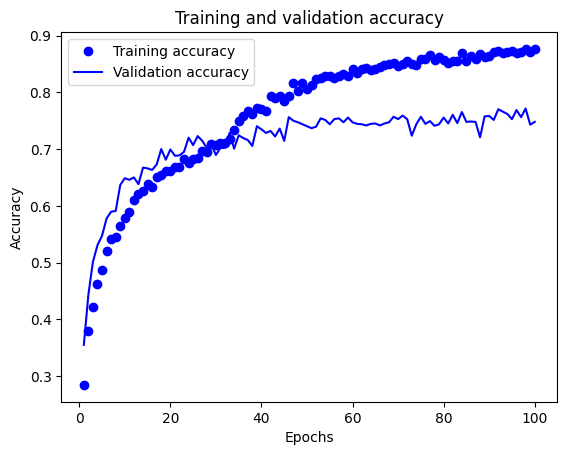

In [42]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [43]:

# Predict on test set
pred_test = model.predict(x_test)
y_pred_indices = np.argmax(pred_test, axis=1)
y_pred_onehot = np.eye(7)[y_pred_indices]
y_pred_labels = encoder.inverse_transform(y_pred_onehot)

# Actual labels
y_test_indices = np.argmax(y_test, axis=1)
y_test_onehot = np.eye(7)[y_test_indices]
y_test_labels = encoder.inverse_transform(y_test_onehot)

# Create DataFrame (flatten the arrays!)
df = pd.DataFrame({
    'Predicted Labels': y_pred_labels.flatten(),
    'Actual Labels': y_test_labels.flatten()
})

print(df.head(10))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  Predicted Labels Actual Labels
0            angry         angry
1          neutral       neutral
2             fear          fear
3              sad       neutral
4          neutral       neutral
5         surprise      surprise
6         surprise      surprise
7              sad           sad
8         surprise      surprise
9         surprise      surprise


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd # Make sure pandas is imported as it's used later for the confusion matrix heatmap

# Predict on test set
pred_test = model.predict(x_test)

# Convert predicted probabilities to class indices
y_pred_indices = np.argmax(pred_test, axis=1)

# Convert actual one-hot encoded labels to class indices
y_test_indices = np.argmax(y_test, axis=1)

# Convert both y_test_indices and y_pred_indices back to original labels using the encoder
# Note: inverse_transform expects a 2D array, so reshape
y_pred_labels = encoder.inverse_transform(np.eye(y_test.shape[1])[y_pred_indices])
y_test_labels = encoder.inverse_transform(np.eye(y_test.shape[1])[y_test_indices])


# Now calculate confusion matrix and classification report using the consistent 'multiclass' labels
# Flatten the labels to remove the extra dimension added by inverse_transform
cm = confusion_matrix(y_test_labels.flatten(), y_pred_labels.flatten())

class_report = classification_report(y_test_labels.flatten(), y_pred_labels.flatten())

print("test :",class_report)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
test :               precision    recall  f1-score   support

       angry       0.75      0.88      0.81       183
     disgust       0.79      0.73      0.76       193
        fear       0.72      0.73      0.72       177
       happy       0.69      0.68      0.68       212
     neutral       0.80      0.84      0.82       270
         sad       0.73      0.63      0.68       226
    surprise       0.74      0.74      0.74       179

    accuracy                           0.75      1440
   macro avg       0.75      0.75      0.74      1440
weighted avg       0.75      0.75      0.75      1440



<Axes: >

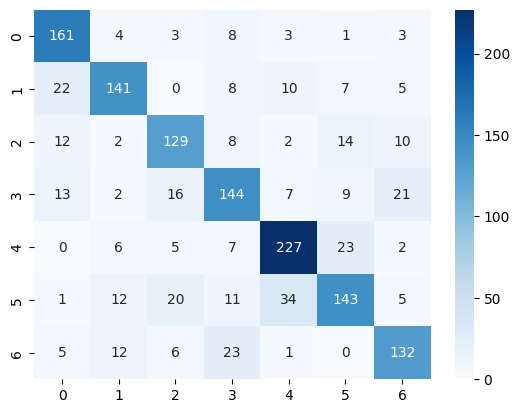

In [48]:

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [52]:
# Save your model to Colab's file system
model.save("/content/emotion_fmodel.h5")
print("The model has been saved as 'emotion_fmodel.h5'.")


The model has been saved as 'emotion_fmodel.h5'.
